<a href="https://colab.research.google.com/github/bbbbbin2/2025_BigData/blob/main/notebook/%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 사고 유형별 교통사고 데이터 로드
df_type = pd.read_excel("/content/사고유형별_교통사고.xls")

# 위반 유형별 교통사고 데이터 로드
df_violation = pd.read_excel("/content/위반유형별_교통사고.xls")

# 연도별 교통사고 데이터 로드
df_year = pd.read_excel("/content/교통사고통계(연도별).xlsx")

# 기상 상태별 교통사고 데이터 로드
df_weather = pd.read_excel("/content/교통사고통계_(기상상태별).xlsx")

# 연령대별 교통사고 데이터 로드
df_age = pd.read_excel("/content/연령대별_교통사고.xls")

# 월별 교통사고 데이터 로드
df_month = pd.read_excel("/content/교통사고통계_월별.xlsx")

# 지역별 교통사고 데이터 로드
df_region = pd.read_excel("/content/지역별_교통사고.xls")

# 화물차 교통사고 다발지역 데이터 로드
df_region_cargo = pd.read_csv("/content/화물차.csv", encoding='cp949')

# 음주운전(지역) 교통사고 데이터 로드
df_alcohol1 = pd.read_excel("/content/음주운전(지역)교통사고통계.xlsx")
df_alcohol2 = pd.read_excel("/content/교통사고통계(음주 3년간).xlsx")
df_alcohol3 = pd.read_excel("/content/교통사고통계_음주운전(연령).xlsx")

# 로드된 데이터프레임의 상위 5개 행 출력
df_type.head(), df_violation.head(), df_year.head(), df_age.head(), df_weather.head(), df_month.head(), df_region.head(), df_region_cargo.head(), df_alcohol1.head(), df_alcohol2.head(), df_alcohol3.head()

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

(    교통사고지표 현황 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
 0        사고유형       발생건수       대형사고     중대한 사고        NaN       사망자수   
 1         NaN        NaN        NaN      여객(건)      화물(건)        NaN   
 2         횡단중      65944          1          2        843       2248   
 3       차도통행중      19789          1          0        256        750   
 4  길가장자리구역통행중      10211          0          0         89        170   
 
   Unnamed: 6  
 0     치사율(%)  
 1        NaN  
 2       3.41  
 3       3.79  
 4       1.66  ,
   교통사고지표 현황 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6
 0      법규위반       발생건수       대형사고     중대한 사고        NaN       사망자수     치사율(%)
 1       NaN        NaN        NaN      여객(건)      화물(건)        NaN        NaN
 2     중앙선침범      39034         13         17        269        899        2.3
 3      신호위반     117785         20         14        960       1152       0.98
 4   안전거리미확보     108772         31          6        857        259 

In [ ]:
import pandas as pd

# 엑셀 파일 로드 함수
def load_excel(path, header=0):
    return pd.read_excel(path, header=header)

# 두 줄 헤더를 단일 헤더로 정리하는 함수
def clean_two_header(df):
    df = df.copy()
    df.columns = df.iloc[0] # 첫 번째 행을 컬럼으로 설정
    df = df.iloc[1:].reset_index(drop=True) # 첫 번째 행 제거 및 인덱스 초기화
    return df

# 완전히 비어있는 행/열 제거 함수
def drop_empty(df):
    return df.dropna(how="all").dropna(axis=1, how="all")

# 숫자형 문자열을 int로 변환하는 함수
def to_int(df, cols):
    df = df.copy()
    for c in cols:
        if c in df.columns:
            # 문자열(쉼표, 하이픈 포함)을 숫자로 변환, 오류 발생 시 NaN으로 처리 후 0으로 채우고 int로 변환
            df[c] = pd.to_numeric(
                df[c].astype(str).str.replace(",", "").replace("-", "0"),
                errors='coerce'
            ).fillna(0).astype(int)
    return df

# 특정 값 (예: '합계', '알수없음')을 가진 행 제거 함수
def drop_values(df, col, values=("합계", "알수없음")):
    df = df.copy()
    for v in values:
        df = df[df[col] != v]
    return df

# 특정 컬럼 값이 일치하는 행 필터링 함수
def filter_eq(df, col, value):
    return df[df[col] == value].copy()

# 데이터프레임에서 연도 컬럼 자동 탐색 함수
def get_year_cols(df):
    return [c for c in df.columns if str(c).isdigit()]

# wide 형식 데이터를 long 형식으로 변환하는 함수
def melt_table(df, id_cols, value_cols,
               var_name="연도", value_name="값"):
    return df.melt(
        id_vars=id_cols,
        value_vars=value_cols,
        var_name=var_name,
        value_name=value_name
    )

# 지역명 통일 함수
def normalize_region(df, col):
    replace_dict = {
        "전라남도": "전남", "전라북도": "전북",
        "경상남도": "경남", "경상북도": "경북",
        "충청남도": "충남", "충청북도": "충북",
        "강원도": "강원",
        "부산광역시": "부산", "대구광역시": "대구",
        "광주광역시": "광주", "인천광역시": "인천",
        "대전광역시": "대전", "울산광역시": "울산",
        "제주특별자치도": "제주",
        "세종특별자치시": "세종",
        "서울특별시": "서울"
    }
    df = df.copy()
    df[col] = df[col].replace(replace_dict, regex=True)
    return df

# 후보 컬럼명 중 실제 데이터프레임에 존재하는 첫 번째 컬럼 반환 함수
def find_main_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    raise KeyError(f"대표 컬럼을 찾을 수 없습니다: {candidates}")

In [ ]:
# df_violation 데이터 전처리: 결측치 제거 및 불필요한 컬럼 제거
df_violation = (
    load_excel("/content/위반유형별_교통사고.xls", header=1)
    .iloc[1:]
    .reset_index(drop=True)
)

# 위반유형 컬럼명 찾기 (여러 후보 중 첫 번째 일치하는 컬럼 사용)
violation_col = find_main_col(
    df_violation,
    ["위반유형", "위반유형별", "구분", "법규위반"]
)

# '합계' 값 제거
df_violation = drop_values(df_violation, violation_col)
# 불필요한 'Unnamed: 4' 컬럼 제거
df_violation = df_violation.drop(columns=['Unnamed: 4'])

df_violation.head()

/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,법규위반,발생건수,대형사고,중대한 사고,사망자수,치사율(%)
0,중앙선침범,39034.0,13.0,17,899.0,2.30
1,신호위반,117785.0,20.0,14,1152.0,0.98
2,안전거리미확보,108772.0,31.0,6,259.0,0.24
3,불법유턴,7292.0,0.0,0,62.0,0.85
4,과속,4744.0,15.0,13,901.0,18.99


In [ ]:
# df_year 데이터 전처리: 연도별 교통사고 데이터 Long 형식으로 변환
df_year_raw = load_excel("/content/교통사고통계(연도별).xlsx")

# 연도 컬럼 추출
year_cols = get_year_cols(df_year_raw)

df_year_long = (
    df_year_raw
    .pipe(lambda x: x[
        (x["분석지표"].isin(["사고건수", "부상자수", "사망자수"])) & # '사고건수', '부상자수', '사망자수' 지표 필터링
        (x["연도"].isin(["전체", "1일평균"])) # '전체', '1일평균' 연도 필터링
    ])
    .pipe(melt_table,
          id_cols=["분석지표", "연도"],
          value_cols=year_cols,
          var_name="년도",
          value_name="값") # Long 형식으로 변환
)

# '년도' 컬럼을 정수형으로 변환
df_year_long["년도"] = df_year_long["년도"].astype(int)
# '분석지표'와 '연도'를 조합하여 새로운 '지표' 컬럼 생성
df_year_long["지표"] = df_year_long["분석지표"] + "_" + df_year_long["연도"]

# '년도'를 인덱스로, '지표'를 컬럼으로 하여 데이터 재구성 (pivot)
df_year = (
    df_year_long
    .pivot(index="년도", columns="지표", values="값")
    .reset_index()
)

df_year_raw.head()

,분석지표,연도,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,사고건수,전체,232035.0,220917.0,216335.0,217148.0,229600.0,209654.0,203130.0,196836.0,198296.0,196349.0
1,사고건수,1일평균,635.7,603.6,592.7,594.9,629.0,572.8,556.5,539.3,543.3,536.5
2,사고건수,인구10만명당,454.8,431.3,420.5,420.8,444.0,404.9,392.0,381.3,384.6,379.4
3,사망자수,전체,4621.0,4292.0,4185.0,3781.0,3349.0,3081.0,2916.0,2735.0,2551.0,2521.0
4,사망자수,1일평균,12.7,11.7,11.5,10.4,9.2,8.4,8.0,7.5,7.0,6.9


In [ ]:
# df_alcohol2 데이터 전처리: 최근 3년 음주운전 시간대별 사망자 데이터 추출
df_raw = load_excel("/content/교통사고통계(음주 3년간).xlsx", header=None)

# 헤더 추출 (연도와 시간대 정보)
year_row = df_raw.iloc[0]
time_row = df_raw.iloc[1]
df = df_raw.iloc[2:].reset_index(drop=True) # 실제 데이터는 세 번째 행부터

# 컬럼명 재구성 (예: '2022_0시~2시')
df.columns = [
    y if y in ["월", "연도"] else f"{y}_{t}"
    for y, t in zip(year_row, time_row)
]

# '월'이 '합계'이고 '연도'가 '사망[명]'인 데이터 필터링
df_death_long = (
    df.pipe(filter_eq, "월", "합계")
      .pipe(filter_eq, "연도", "사망[명]")
)

# 시간대별 컬럼 추출
time_cols = [c for c in df_death_long.columns if "202" in c]

# 시간대별 사망자 데이터 재구성
df_death_long = df_death_long[time_cols].T.reset_index()
df_death_long.columns = ["연도_시간대", "사망자수"]
# '연도_시간대' 컬럼에서 시간대 정보 추출
df_death_long["시간대"] = df_death_long["연도_시간대"].str.split("_").str[1]

# '사망자수' 컬럼을 정수형으로 변환
df_death_long = to_int(df_death_long, ["사망자수"])

# 시간대별 사망자수 합계 계산
df_death = (
    df_death_long
    .groupby("시간대", as_index=False)["사망자수"]
    .sum()
)

# 시간대별 사망자 비율 계산
df_death["비율"] = df_death["사망자수"] / df_death["사망자수"].sum() * 100

In [ ]:
# df_alcohol3 데이터 전처리: 2024년 음주운전 사망사고 연령대별 데이터 추출
df = clean_two_header(df_alcohol3) # 헤더 정리

# '연도'가 '사망[명]'인 데이터 필터링 후 '가해운전자(1당) 연령대'에서 '합계' 값 제거
df_death_age = (
    df.pipe(filter_eq, "연도", "사망[명]")
      .pipe(drop_values, "가해운전자(1당) 연령대")
      [["가해운전자(1당) 연령대", "합계"]] # '가해운전자(1당) 연령대'와 '합계' 컬럼만 선택
)

# '합계' 컬럼을 정수형으로 변환
df_death_age = to_int(df_death_age, ["합계"])
# '합계' 기준으로 내림차순 정렬
df_death_age = df_death_age.sort_values("합계", ascending=False)


,가해운전자(1당) 연령대,연도,합계,중앙선 침범,신호위반,안전거리 미확보,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,기타
0,합계,사고[건],11037,672,689,509,8476,134,67,490
1,합계,사망[명],138,17,11,3,82,1,1,23
2,합계,부상[명],17110,1169,1144,857,12957,192,79,712
3,19세 이하,사고[건],117,3,11,2,91,1,0,9
4,19세 이하,사망[명],1,0,1,0,0,0,0,0
5,19세 이하,부상[명],155,4,14,3,120,1,0,13
6,20-29세,사고[건],1907,121,158,80,1410,18,10,110
7,20-29세,사망[명],54,6,2,3,27,0,1,15
8,20-29세,부상[명],2952,222,277,137,2130,28,9,149
9,30-39세,사고[건],2428,127,169,121,1870,22,9,110


In [ ]:
# df_alcohol1 데이터 전처리: 음주운전(지역) 교통사고 데이터를 long 형식으로 변환

# 1. '시도' 컬럼의 지역명 통일 (표준화)
df_alcohol1_processed = normalize_region(df_alcohol1, "시도")

# 2. '시도' 및 '연도' 컬럼에서 '합계' 행 필터링
df_alcohol1_processed = df_alcohol1_processed[df_alcohol1_processed['시도'] != '합계']
df_alcohol1_processed = df_alcohol1_processed[df_alcohol1_processed['연도'] != '합계']

# 3. long 형식으로 변환할 연도 컬럼 목록 추출
year_cols_alcohol1 = [col for col in df_alcohol1_processed.columns if str(col).isdigit()]

# 4. 숫자형 연도 컬럼들을 정수형으로 변환 (to_int 유틸리티 함수 사용)
df_alcohol1_processed = to_int(df_alcohol1_processed, year_cols_alcohol1)

# 5. wide 형식 데이터를 long 형식으로 변환
id_vars_alcohol1 = ['시도', '연도']
df_alcohol1_long = melt_table(df_alcohol1_processed,
                              id_cols=id_vars_alcohol1,
                              value_cols=year_cols_alcohol1,
                              var_name='년도',
                              value_name='값')

# 6. '년도' 컬럼을 정수형으로 변환
df_alcohol1_long['년도'] = df_alcohol1_long['년도'].astype(int)

# 전처리 결과 출력
print("전처리된 df_alcohol1 데이터의 상위 5행:")
display(df_alcohol1_long.head())
print("\n전처리된 df_alcohol1 데이터의 컬럼 정보:")
display(df_alcohol1_long.info())

전처리된 df_alcohol1 데이터의 상위 5행:


,시도,연도,년도,값
0,서울,사고[건],2020,2327
1,서울,사망[명],2020,16
2,서울,부상[명],2020,3817
3,부산,사고[건],2020,742
4,부산,사망[명],2020,5



전처리된 df_alcohol1 데이터의 컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      265 non-null    object
 1   연도      255 non-null    object
 2   년도      265 non-null    int64 
 3   값       265 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.4+ KB


None

In [ ]:
# df_alcohol1 데이터 전처리: 음주운전(지역) 교통사고 데이터를 long 형식으로 변환

# 1. '시도' 컬럼의 지역명 통일 (표준화)
df_alcohol1_processed = normalize_region(df_alcohol1, "시도")

# 2. '시도' 및 '연도' 컬럼에서 '합계' 행 필터링
df_alcohol1_processed = df_alcohol1_processed[df_alcohol1_processed['시도'] != '합계']
df_alcohol1_processed = df_alcohol1_processed[df_alcohol1_processed['연도'] != '합계']

# 3. long 형식으로 변환할 연도 컬럼 목록 추출
year_cols_alcohol1 = [col for col in df_alcohol1_processed.columns if str(col).isdigit()]

# 4. 숫자형 연도 컬럼들을 정수형으로 변환 (to_int 유틸리티 함수 사용)
df_alcohol1_processed = to_int(df_alcohol1_processed, year_cols_alcohol1)

# 5. wide 형식 데이터를 long 형식으로 변환
id_vars_alcohol1 = ['시도', '연도']
df_alcohol1_long = melt_table(df_alcohol1_processed,
                              id_cols=id_vars_alcohol1,
                              value_cols=year_cols_alcohol1,
                              var_name='년도',
                              value_name='값')

# 6. '년도' 컬럼을 정수형으로 변환
df_alcohol1_long['년도'] = df_alcohol1_long['년도'].astype(int)

# 전처리 결과 출력
print("전처리된 df_alcohol1 데이터의 상위 5행:")
display(df_alcohol1_long.head())
print("\n전처리된 df_alcohol1 데이터의 컬럼 정보:")
display(df_alcohol1_long.info())

전처리된 df_alcohol1 데이터의 상위 5행:


,시도,연도,년도,값
0,서울,사고[건],2020,2327
1,서울,사망[명],2020,16
2,서울,부상[명],2020,3817
3,부산,사고[건],2020,742
4,부산,사망[명],2020,5



전처리된 df_alcohol1 데이터의 컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도      265 non-null    object
 1   연도      255 non-null    object
 2   년도      265 non-null    int64 
 3   값       265 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 8.4+ KB


None

In [ ]:
# df_age, df_region 데이터 전처리: '알수없음', NaN 값 제거 및 컬럼명 정리

df_age = clean_two_header(df_age) # df_age 헤더 정리
df_region = clean_two_header(df_region) # df_region 헤더 정리

# 주요 컬럼명 확인 및 명시적 재설정
if df_age.columns[0] != '연령대별':
    df_age.rename(columns={df_age.columns[0]: '연령대별'}, inplace=True)

if df_region.columns[0] != '시도':
    df_region.rename(columns={df_region.columns[0]: '시도'}, inplace=True)

age_col = '연령대별'
region_col = '시도'

# NaN 값이 있는 행 제거
df_age = df_age.dropna(subset=[age_col])
df_region = df_region.dropna(subset=[region_col])

# '합계', '알수없음' 값 제거
df_age = drop_values(df_age, age_col, values=("합계", "알수없음"))
df_region = drop_values(df_region, region_col, values=("합계", "알수없음"))

# 전처리 결과 출력
print("df_age 연령대별 고유 값:")
display(df_age[age_col].unique())
print("\ndf_region 시도 고유 값:")
display(df_region[region_col].unique())

df_age 연령대별 고유 값:


array(['20세이하', '21~30세', '31~40세', '41~50세', '51~60세', '61~64세', '65세이상'],
      dtype=object)


df_region 시도 고유 값:


array(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북',
       '충남', '전북', '전남', '경북', '경남', '제주'], dtype=object)

In [ ]:
# df_region_cargo 데이터 전처리: 화물차 사고 다발지역 데이터 통합 및 TOP10 추출

# '지점명' 컬럼의 지역명 통일
df_region_cargo = normalize_region(df_region_cargo, "지점명")

# '지점명' 기준으로 그룹화하여 사고 관련 지표 합계 계산
df_cargo_grouped = (
    df_region_cargo
    .groupby("지점명", as_index=False)
    .agg({
        "사고건수": "sum",
        "사상자수": "sum",
        "사망자수": "sum",
        "중상자수": "sum",
        "경상자수": "sum",
        "부상신고자수": "sum",
        "경도": "mean",
        "위도": "mean"
    })
)

# 사고건수 기준 상위 10개 지역 추출
df_cargo_top10 = df_cargo_grouped.sort_values("사고건수", ascending=False).head(10)
# 사망자수 기준 상위 10개 지역 추출
df_cargo_dead_top = df_cargo_grouped.sort_values("사망자수", ascending=False).head(10)

In [ ]:
# df_region_cargo 전처리 결과 출력

print("\n화물차 사고 다발 지역 TOP 10:")
display(df_cargo_top10)

print("\n화물차 사망자 다발 지역 TOP 10:")
display(df_cargo_dead_top)


화물차 사고 다발 지역 TOP 10:


,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
52,경기 성남시 중원구 성남동(모란삼거리 부근),24,34,0,24,10,0,127.128774,37.433103
659,전남 여수시 교동(여객선터미널입구교차로 부근),16,16,0,16,0,0,127.731707,34.739170
465,부산 중구 남포동6가(자갈치교차로 부근),16,17,0,16,1,0,129.026199,35.096803
494,서울 구로구 구로동(구로4동주민센터 부근),15,18,0,15,3,0,126.888637,37.491222
204,경남 사천시 동금동(2호광장교차로 부근),15,19,0,16,3,0,128.077245,34.932910
94,경기 용인시 처인구 백암면(근곡사거리 부근),15,31,1,14,15,1,127.370432,37.169956
319,대구 달서구 죽전동(죽전네거리 부근),14,25,5,11,9,0,128.537150,35.850766
598,서울 중구 신당동(신당역교차로 부근),14,17,0,17,0,0,127.016235,37.565875
477,서울 강북구 미아동(구립솔샘어린이집 부근),13,16,0,13,3,0,127.017868,37.628874
184,경남 김해시 삼계동(삼계사거리 부근),13,26,0,13,13,0,128.860375,35.270173



화물차 사망자 다발 지역 TOP 10:


,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
661,전남 여수시 서교동(한재사거리 부근),9,59,10,11,34,4,127.728156,34.742757
319,대구 달서구 죽전동(죽전네거리 부근),14,25,5,11,9,0,128.537150,35.850766
393,부산 금정구 회동동(18번교차로 부근),10,10,4,6,0,0,129.117540,35.225924
58,경기 성남시 중원구 중앙동(중앙동사거리 부근),13,17,3,12,2,0,127.152441,37.442432
642,인천 중구 신흥동2가(신흥사거리 부근),10,14,3,7,4,0,126.634911,37.466657
227,경남 통영시 북신동(무전사거리 부근),12,16,3,9,4,0,128.427985,34.857013
126,경기도 군포시 산본동(원광대학교 산본병원 부근),5,5,3,2,0,0,126.933161,37.359310
569,서울 송파구 문정동(신한신이한이송파어린이집 부근),9,9,3,6,0,0,127.116055,37.491592
582,서울 영등포구 문래동5가(27-2 부근),8,8,2,6,0,0,126.882609,37.516537
298,광주 광산구 비아동(비아동행정복지센터 부근),8,8,2,6,0,0,126.824510,35.221644


In [ ]:
# df_alcohol3 데이터 전처리: 연령대별 × 사고원인 히트맵 데이터 준비

df = clean_two_header(df_alcohol3) # 헤더 정리

# '연도'가 '사고[건]'인 데이터 필터링 후 '가해운전자(1당) 연령대'에서 '합계' 값 제거
df_accident = (
    df.pipe(filter_eq, "연도", "사고[건]")
      .pipe(drop_values, "가해운전자(1당) 연령대")
)

# 사고 원인 컬럼 목록 정의
cause_cols = [
    "중앙선 침범", "신호위반", "안전거리 미확보",
    "안전운전 의무 불이행", "교차로 통행방법 위반",
    "보행자 보호의무 위반", "기타"
]

# 히트맵 생성을 위한 데이터프레임 준비: 연령대별 사고 원인 데이터 선택
df_heat = df_accident[["가해운전자(1당) 연령대"] + cause_cols]
# 사고 원인 컬럼들을 정수형으로 변환
df_heat = to_int(df_heat, cause_cols)
# '가해운전자(1당) 연령대'를 인덱스로 설정
df_heat = df_heat.set_index("가해운전자(1당) 연령대")

df_heat.head()

,중앙선 침범,신호위반,안전거리 미확보,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,기타
가해운전자(1당) 연령대,,,,,,,
19세 이하,3,11,2,91,1,0,9
20-29세,121,158,80,1410,18,10,110
30-39세,127,169,121,1870,22,9,110
40-49세,139,169,102,1905,26,17,100
50-59세,139,111,112,1742,40,18,87


In [ ]:
# df_month 데이터 전처리: 월별 교통사고 데이터를 long 형식으로 변환

# 1. df_month_raw 데이터 로드 (헤더 없이)
df_month_raw = pd.read_excel("/content/교통사고통계_월별.xlsx", header=None)

# 2. 실제 컬럼 헤더를 두 번째 행에서 추출
actual_headers = df_month_raw.iloc[1].tolist()

# 3. 데이터프레임에 적용할 새로운 컬럼명 생성 (연도 float을 int로 변환, '합계' 처리)
processed_headers = []
for h in actual_headers:
    if h == '합계':
        processed_headers.append('전체_합계')
    elif isinstance(h, float) and pd.notna(h): # 2020.0과 같은 연도를 2020으로 변환
        processed_headers.append(str(int(h)))
    else:
        processed_headers.append(h)

# 4. 새로운 컬럼명 적용 및 원본 헤더 행 (상위 2행) 제거
df_month_processed = df_month_raw.iloc[2:].copy()
df_month_processed.columns = processed_headers

# 5. '연도' 컬럼명을 '지표'로 변경
df_month_processed.rename(columns={'연도': '지표'}, inplace=True)

# 6. '월' 및 '지표' 컬럼에서 '합계' 행 필터링
df_month_processed = df_month_processed[df_month_processed['월'] != '합계']
df_month_processed = df_month_processed[df_month_processed['지표'] != '합계']

# '월' 컬럼에서 '월' 접미사 제거
df_month_processed['월'] = df_month_processed['월'].astype(str).str.replace('월', '')

# '월' 컬럼이 순수하게 숫자로만 구성된 행만 필터링
df_month_processed = df_month_processed[df_month_processed['월'].str.isdigit()]

# 7. long 형식으로 변환할 연도 컬럼 목록 추출
year_cols = [col for col in df_month_processed.columns if col.isdigit()] # '2020', '2021' 등

# 8. 숫자형 연도 컬럼들을 정수형으로 변환 (to_int 유틸리티 함수 사용)
df_month_processed = to_int(df_month_processed, year_cols)

# 9. wide 형식 데이터를 long 형식으로 변환
id_vars = ['월', '지표']
df_month_long = melt_table(df_month_processed,
                           id_cols=id_vars,
                           value_cols=year_cols,
                           var_name='연도', # '연도' 컬럼 직접 지정
                           value_name='값')

# 10. '연도' 및 '월' 컬럼을 정수형으로 변환
df_month_long['연도'] = df_month_long['연도'].astype(int)
df_month_long['월'] = df_month_long['월'].astype(int)

# 전처리 결과 출력
print("전처리된 df_month 데이터의 상위 5행:")
display(df_month_long.head())
print("\n전처리된 df_month 데이터의 컬럼 정보:")
display(df_month_long.info())

전처리된 df_month 데이터의 상위 5행:


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,월,지표,연도,값
0,1,사고[건],2020,16968
1,1,사망[명],2020,277
2,1,부상[명],2020,25442
3,2,사고[건],2020,16285
4,2,사망[명],2020,222



전처리된 df_month 데이터의 컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   월       180 non-null    int64 
 1   지표      180 non-null    object
 2   연도      180 non-null    int64 
 3   값       180 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ KB


None

In [ ]:
# df_alcohol1 데이터 전처리 시작
print("df_alcohol1 데이터 상위 5개 행:")
display(df_alcohol1.head())

df_alcohol1 데이터 상위 5개 행:


,시도,연도,합계,2020,2021,2022,2023,2024
0,합계,사고[건],71279.0,17247.0,14894.0,15059.0,13042.0,11037.0
1,합계,사망[명],1004.0,287.0,206.0,214.0,159.0,138.0
2,합계,부상[명],113715.0,28063.0,23653.0,24261.0,20628.0,17110.0
3,서울,사고[건],10248.0,2327.0,2059.0,2348.0,1938.0,1576.0
4,서울,사망[명],82.0,16.0,23.0,23.0,8.0,12.0


In [ ]:
# df_alcohol1 데이터 전처리 시작
print("df_alcohol1 데이터 상위 5개 행:")
display(df_alcohol1.head())

df_alcohol1 데이터 상위 5개 행:


,시도,연도,합계,2020,2021,2022,2023,2024
0,합계,사고[건],71279.0,17247.0,14894.0,15059.0,13042.0,11037.0
1,합계,사망[명],1004.0,287.0,206.0,214.0,159.0,138.0
2,합계,부상[명],113715.0,28063.0,23653.0,24261.0,20628.0,17110.0
3,서울,사고[건],10248.0,2327.0,2059.0,2348.0,1938.0,1576.0
4,서울,사망[명],82.0,16.0,23.0,23.0,8.0,12.0


In [ ]:
# df_violation 요약 통계 출력
print("df_violation 요약 통계:")
display(df_violation.describe())

# df_year 요약 통계 출력
print("\ndf_year 요약 통계:")
display(df_year.describe())

# df_age 요약 통계 출력
print("\ndf_age 요약 통계:")
display(df_age.describe())

# df_region 요약 통계 출력
print("\ndf_region 요약 통계:")
display(df_region.describe())

# df_region_cargo 요약 통계 출력
print("\ndf_region_cargo 요약 통계:")
display(df_region_cargo.describe())

# df_death (음주운전 시간대별 사망자) 요약 통계 출력
print("\ndf_death (음주운전 시간대별 사망자) 요약 통계:")
display(df_death.describe())

# df_death_age (음주운전 연령대별 사망자) 요약 통계 출력
print("\ndf_death_age (음주운전 연령대별 사망자) 요약 통계:")
display(df_death_age.describe())

# df_heat (연령대별 사고 원인 히트맵 데이터) 요약 통계 출력
print("\ndf_heat (연령대별 사고 원인 히트맵 데이터) 요약 통계:")
display(df_heat.describe())

# df_type_processed (사고 유형별 교통사고) 요약 통계 출력
print("\ndf_type_processed (사고 유형별 교통사고) 요약 통계:")
display(df_type_processed.describe())

# df_weather_long (기상 상태별 교통사고) 요약 통계 출력
print("\ndf_weather_long (기상 상태별 교통사고) 요약 통계:")
display(df_weather_long.describe())

# df_month_long (월별 교통사고) 요약 통계 출력
print("\ndf_month_long (월별 교통사고) 요약 통계:")
display(df_month_long.describe())

df_violation 요약 통계:


,발생건수,대형사고,사망자수,치사율(%)
count,11.000000,11.000000,11.000000,11.000000
mean,91281.363636,18.181818,1254.818182,2.644545
std,159730.013425,32.682773,2660.053752,5.468684
min,4744.000000,0.000000,32.000000,0.210000
25%,21857.500000,1.500000,130.000000,0.300000
50%,34559.000000,3.000000,511.000000,0.980000
75%,83914.000000,17.500000,900.000000,1.720000
max,559352.000000,112.000000,9191.000000,18.990000



df_year 요약 통계:


지표,년도,부상자수_1일평균,부상자수_전체,사고건수_1일평균,사고건수_전체,사망자수_1일평균,사망자수_전체
count,10.00000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,2019.50000,851.800000,311158.400000,580.430000,212030.00000,9.330000,3403.200000
std,3.02765,72.370359,26370.007969,36.425908,13261.64131,2.112424,768.987328
min,2015.00000,760.900000,278482.000000,536.500000,196349.00000,6.900000,2521.000000
25%,2017.25000,782.850000,285751.250000,546.600000,199504.50000,7.625000,2780.250000
50%,2019.50000,860.550000,314511.500000,582.750000,212994.50000,8.800000,3215.000000
75%,2021.75000,900.975000,329549.250000,601.425000,219974.75000,11.225000,4084.000000
max,2024.00000,960.000000,350400.000000,635.700000,232035.00000,12.700000,4621.000000



df_age 요약 통계:


,연령대별,발생건수,대형사고,중대한 사고,NaN,사망자수,치사율(%)
count,7,7,7,7,7,7,7.00
unique,7,7,6,6,7,7,7.00
top,20세이하,31725,20,5,2,369,1.16
freq,1,1,2,2,1,1,1.00



df_region 요약 통계:


,시도,발생건수,대형사고,중대한 사고,NaN,사망자수,치사율(%)
count,17,17,17,17,17,17,17.00
unique,17,17,11,11,16,17,15.00
top,서울,170114,6,0,179,1075,0.77
freq,1,1,3,3,2,1,2.00



df_region_cargo 요약 통계:


,사고다발지fid,사고다발지id,법정동코드,지점코드,사고건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도
count,8.800000e+02,8.800000e+02,8.800000e+02,8.800000e+02,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000,880.000000
mean,6.894021e+06,2.023321e+06,3.301224e+09,3.301210e+07,4.255682,6.130682,0.253409,4.377273,1.393182,0.106818,127.669829,36.460592
std,1.265081e+05,1.119718e+03,1.329880e+09,1.329877e+07,0.689158,3.000184,0.538072,1.082882,2.271142,0.426589,0.907675,1.043594
min,6.787504e+06,2.022048e+06,1.111014e+09,1.111000e+07,4.000000,4.000000,0.000000,2.000000,0.000000,0.000000,126.114211,33.222038
25%,6.787741e+06,2.022048e+06,2.623011e+09,2.623001e+07,4.000000,4.000000,0.000000,4.000000,0.000000,0.000000,126.910202,35.371343
50%,6.827290e+06,2.023054e+06,4.111513e+09,4.111500e+07,4.000000,5.000000,0.000000,4.000000,1.000000,0.000000,127.163783,36.625435
75%,6.930757e+06,2.024048e+06,4.421010e+09,4.421000e+07,4.000000,7.000000,0.000000,5.000000,2.000000,0.000000,128.577503,37.480332
max,7.132585e+06,2.025089e+06,5.280025e+09,5.280000e+07,13.000000,30.000000,5.000000,13.000000,17.000000,5.000000,129.551203,38.198361



df_death (음주운전 시간대별 사망자) 요약 통계:


,사망자수,비율
count,13.000000,13.000000
mean,78.615385,7.692308
std,132.428936,12.957822
min,10.000000,0.978474
25%,22.000000,2.152642
50%,42.000000,4.109589
75%,74.000000,7.240705
max,511.000000,50.000000



df_death_age (음주운전 연령대별 사망자) 요약 통계:


,합계
count,7.000000
mean,19.714286
std,17.839229
min,1.000000
25%,9.000000
50%,12.000000
75%,26.500000
max,54.000000



df_heat (연령대별 사고 원인 히트맵 데이터) 요약 통계:


,중앙선 침범,신호위반,안전거리 미확보,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,기타
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,96.000000,98.428571,72.714286,1210.857143,19.142857,9.571429,70.000000
std,50.289164,69.799372,43.419329,701.966863,12.171395,6.347103,42.190046
min,3.000000,11.000000,2.000000,91.000000,1.000000,0.000000,9.000000
25%,71.500000,35.500000,46.000000,729.000000,13.500000,6.500000,37.000000
50%,121.000000,111.000000,80.000000,1410.000000,18.000000,9.000000,87.000000
75%,133.000000,163.500000,107.000000,1806.000000,24.000000,13.500000,105.000000
max,139.000000,169.000000,121.000000,1905.000000,40.000000,18.000000,110.000000



df_type_processed (사고 유형별 교통사고) 요약 통계:


,발생건수,대형사고,중대한 사고,사망자수,치사율(%)
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,55792.500000,11.111111,6.666667,766.888889,8.333333
std,93553.447498,21.989005,10.605215,744.087905,13.809630
min,12.000000,0.000000,0.000000,7.000000,0.000000
25%,2529.000000,0.250000,0.000000,111.250000,1.000000
50%,16150.500000,2.000000,1.500000,531.500000,3.000000
75%,59233.750000,9.000000,13.000000,1373.500000,11.000000
max,342097.000000,87.000000,38.000000,2248.000000,58.000000



df_weather_long (기상 상태별 교통사고) 요약 통계:


,값,연도,월
count,228.000000,228.0,228.000000
mean,2093.649123,2024.0,6.500000
std,5408.094936,0.0,3.459648
min,0.000000,2024.0,1.000000
25%,2.000000,2024.0,3.750000
50%,140.500000,2024.0,6.500000
75%,670.250000,2024.0,9.250000
max,22930.000000,2024.0,12.000000



df_month_long (월별 교통사고) 요약 통계:


,월,연도,값
count,180.000000,180.000000,180.000000
mean,6.500000,2022.000000,13666.416667
std,3.461682,1.418158,10090.677028
min,1.000000,2020.000000,161.000000
25%,3.750000,2021.000000,254.000000
50%,6.500000,2022.000000,16984.000000
75%,9.250000,2023.000000,23019.500000
max,12.000000,2024.000000,28190.000000


In [ ]:
# df_weather 데이터 전처리: 기상 상태별 교통사고 데이터를 long 형식으로 변환

# 1. df_weather_raw 데이터 로드 (헤더 없이)
df_weather_raw = pd.read_excel("/content/교통사고통계_(기상상태별).xlsx", header=None)

# 2. 헤더 행 추출 (첫 번째 행: 연도 정보, 두 번째 행: 월/지표 정보)
first_header_row = df_weather_raw.iloc[0]
second_header_row = df_weather_raw.iloc[1]

# 3. 새로운 컬럼명 구성
new_columns = []
for i in range(len(first_header_row)):
    if i < 2:  # 처음 두 컬럼은 '기상상태'와 '연도'
        new_columns.append(first_header_row[i])
    else:  # 연도-월 조합 컬럼
        year_part = str(first_header_row[i]).split('.')[0]  # '2024.1' -> '2024'
        month_part = str(second_header_row[i]).replace('월', '').strip()  # '01월' -> '01'
        new_columns.append(f"{year_part}_{month_part}")

# 4. 새로운 컬럼명 적용 및 원본 헤더 행 제거
df_weather_processed = df_weather_raw.iloc[2:].copy()
df_weather_processed.columns = new_columns
# '연도' 컬럼명을 '지표'로 변경
df_weather_processed.rename(columns={'연도': '지표'}, inplace=True)

# 5. '기상상태' 및 '지표' 컬럼에서 '합계' 행 필터링
df_weather_processed = df_weather_processed[df_weather_processed['기상상태'] != '합계']
df_weather_processed = df_weather_processed[df_weather_processed['지표'] != '합계']

# 6. 숫자형 컬럼들을 정수형으로 변환 (월 부분이 '합계'인 컬럼 제외)
year_month_cols = [col for col in df_weather_processed.columns if '_' in col and col.split('_')[0].isdigit() and col.split('_')[1] != '합계']
df_weather_processed = to_int(df_weather_processed, year_month_cols)

# 7. wide 형식 데이터를 long 형식으로 변환
id_vars = ['기상상태', '지표']
df_weather_long = melt_table(df_weather_processed,
                             id_cols=id_vars,
                             value_cols=year_month_cols,
                             var_name='연도_월',
                             value_name='값')

# 8. '연도_월' 컬럼을 '연도'와 '월'로 분리 및 타입 변환
df_weather_long[['연도', '월']] = df_weather_long['연도_월'].str.split('_', expand=True)
df_weather_long['연도'] = df_weather_long['연도'].astype(int)
df_weather_long['월'] = df_weather_long['월'].astype(int) # '월' 컬럼을 정수형으로 변환

# 전처리 결과 출력
print("전처리된 df_weather 데이터의 상위 5행:")
display(df_weather_long.head())
print("\n전처리된 df_weather 데이터의 컬럼 정보:")
display(df_weather_long.info())

전처리된 df_weather 데이터의 상위 5행:


/usr/local/lib/python3.12/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,기상상태,지표,연도_월,값,연도,월
0,맑음,사고[건],2024_01,13101,2024,1
1,맑음,사망[명],2024_01,146,2024,1
2,맑음,부상[명],2024_01,18641,2024,1
3,흐림,사고[건],2024_01,704,2024,1
4,흐림,사망[명],2024_01,23,2024,1



전처리된 df_weather 데이터의 컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기상상태    228 non-null    object
 1   지표      216 non-null    object
 2   연도_월    228 non-null    object
 3   값       228 non-null    int64 
 4   연도      228 non-null    int64 
 5   월       228 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 10.8+ KB


None

In [ ]:
# df_type 데이터 전처리: 사고 유형별 교통사고 데이터 정리

df_type_processed = clean_two_header(df_type) # 헤더 정리

# 사고유형 컬럼명 찾기
type_col = find_main_col(df_type_processed, ["사고유형"])

# 결측치 제거
if float('nan') in df_type_processed.columns:
    df_type_processed = df_type_processed.drop(columns=[float('nan')])

df_type_processed = df_type_processed.iloc[1:].reset_index(drop=True)

# '합계', '알수없음' 값 제거
df_type_processed = drop_values(df_type_processed, type_col)

# 숫자형 > 정수형으로 변환
numeric_cols = ["발생건수", "대형사고", "중대한 사고", "사망자수", "치사율(%)"]
df_type_processed = to_int(df_type_processed, numeric_cols)

print("전처리된 df_type 데이터의 상위 5행:")
display(df_type_processed.head())
print("\n전처리된 df_type 데이터의 컬럼 정보:")
display(df_type_processed.info())

전처리된 df_type 데이터의 상위 5행:


,사고유형,발생건수,대형사고,중대한 사고,사망자수,치사율(%)
0,횡단중,65944,1,2,2248,3
1,차도통행중,19789,1,0,750,3
2,길가장자리구역통행중,10211,0,0,170,1
3,보도통행중,11722,1,0,118,1
4,차대사람-기타,74452,3,0,1403,1



전처리된 df_type 데이터의 컬럼 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사고유형    18 non-null     object
 1   발생건수    18 non-null     int64 
 2   대형사고    18 non-null     int64 
 3   중대한 사고  18 non-null     int64 
 4   사망자수    18 non-null     int64 
 5   치사율(%)  18 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1008.0+ bytes


None

/tmp/ipython-input-2827694549.py:44: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2827694549.py:44: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2827694549.py:44: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2827694549.py:44: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2827694549.py:44: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2827694549.py:44: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2827694549.py:44: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout

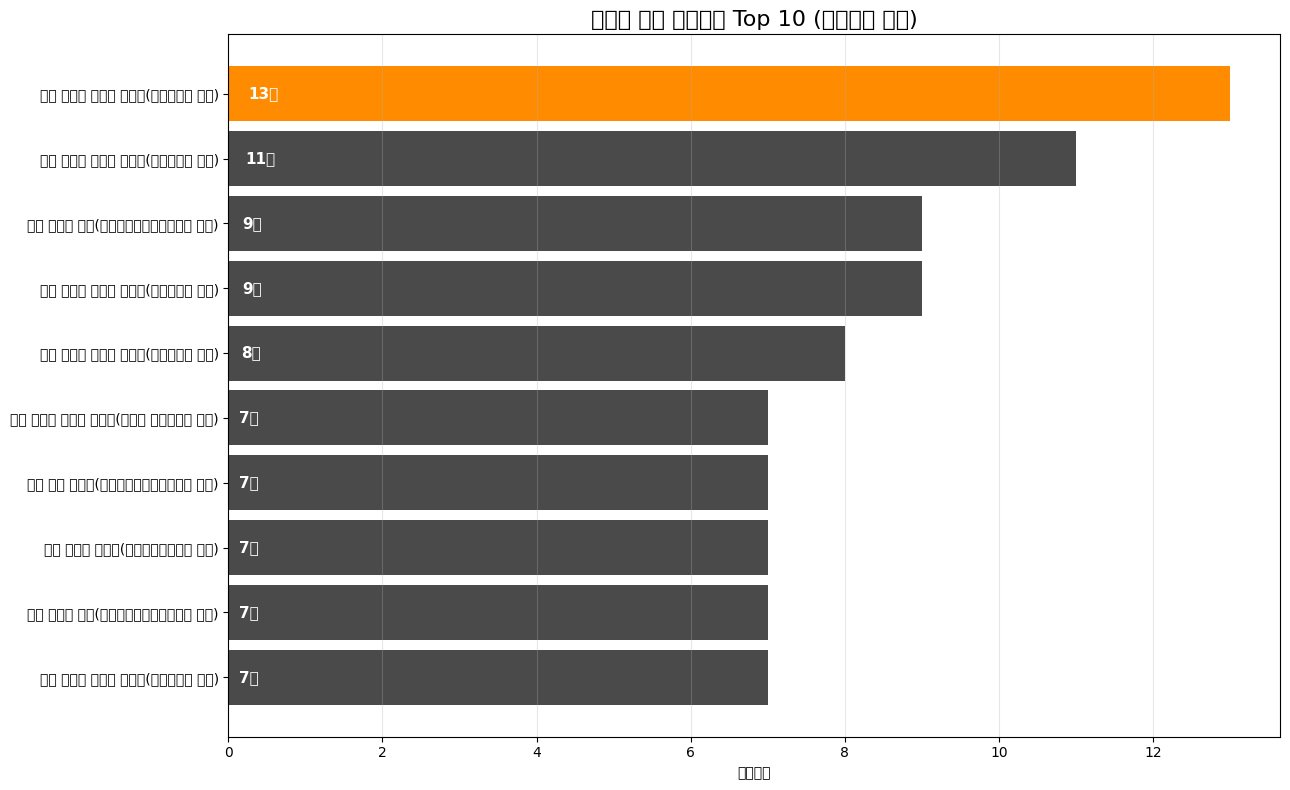

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

df_cargo_top10 = df_region_cargo.sort_values("사고건수", ascending=False).head(10)

labels = df_cargo_top10["지점명"]
values = df_cargo_top10["사고건수"]

BASE_COLOR = "#4a4a4a"
HIGHLIGHT  = "#ff8c00"
colors = [HIGHLIGHT if v == values.max() else BASE_COLOR for v in values]

y = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(13, 8))
ax.barh(
    y,
    values,
    color=colors,
    height=0.85
)

# 막대 내부 수치
for i, v in enumerate(values):
    ax.text(
        v * 0.02,
        i,
        f"{int(v)}건",
        va="center",
        ha="left",
        color="white",
        fontsize=11,
        fontweight="bold"
    )

ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.invert_yaxis()

ax.set_title("화물차 사고 다발지역 Top 10 (사고건수 기준)", fontsize=16)
ax.set_xlabel("사고건수")
ax.grid(axis="x", alpha=0.3)

plt.tight_layout()
plt.show()
